### 개, 고양이, 맹수 분류
> https://www.kaggle.com/datasets/andrewmvd/animal-faces

In [1]:
from glob import glob
import os

# 경로 설정
root = './datasets/afhq/original/'

# root경로 내의 모든 폴더(*)
directories = glob(os.path.join(root, '*'))
directory_names = []
for directory in directories:
    # 폴더 명을 하나씩 directory_names에 담아줌
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['cat', 'dog', 'wild']


In [2]:
# directory_names에 담긴 이름을 통해 폴더 내의 파일 명을 변경. ex)King01
for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지의 모든 픽셀값(0 ~ 255)을 255로 나누어줘서 0 ~ 1값으로 정규화
image_data_generator = ImageDataGenerator(rescale=1./255)

# root경로를 불러오고 target_size를 통해 width와 height를 244 X 244로 조정, 다중 분류이기 때문에 categorical을 통해 원핫 인코딩
generator = image_data_generator.flow_from_directory(root, target_size=(244, 244), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 14630 images belonging to 3 classes.
{'cat': 0, 'dog': 1, 'wild': 2}


In [4]:
import pandas as pd

# 파일 내의 각 사진의 경로와 인코딩 된 타겟을 DataFrame으로 만들어
c_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
c_df

,file_paths,targets
0,./datasets/afhq/original/cat\cat1.png,0
1,./datasets/afhq/original/cat\cat10.png,0
2,./datasets/afhq/original/cat\cat100.png,0
3,./datasets/afhq/original/cat\cat1000.png,0
4,./datasets/afhq/original/cat\cat1001.png,0
...,...,...
14625,./datasets/afhq/original/wild\wild995.png,2
14626,./datasets/afhq/original/wild\wild996.png,2
14627,./datasets/afhq/original/wild\wild997.png,2
14628,./datasets/afhq/original/wild\wild998.png,2


In [5]:
# file_paths 피쳐에 \로 된 부분을 /로 변경
c_df.loc[:, 'file_paths'] = c_df.file_paths.apply(lambda x: x.replace('\\', '/'))
c_df

,file_paths,targets
0,./datasets/afhq/original/cat/cat1.png,0
1,./datasets/afhq/original/cat/cat10.png,0
2,./datasets/afhq/original/cat/cat100.png,0
3,./datasets/afhq/original/cat/cat1000.png,0
4,./datasets/afhq/original/cat/cat1001.png,0
...,...,...
14625,./datasets/afhq/original/wild/wild995.png,2
14626,./datasets/afhq/original/wild/wild996.png,2
14627,./datasets/afhq/original/wild/wild997.png,2
14628,./datasets/afhq/original/wild/wild998.png,2


In [6]:
# 타겟 비중 확인
c_df.targets.value_counts()

targets
0    5153
1    4739
2    4738
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

# c_df에서 train데이터와 test데이터 분리
X_train, X_val, y_train, y_val = \
train_test_split(c_df.file_paths, c_df.targets, stratify=c_df.targets, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_val.value_counts())

targets
0    4123
1    3791
2    3790
Name: count, dtype: int64
targets
0    1030
2     948
1     948
Name: count, dtype: int64


In [9]:
import shutil

# 파일 경로
root = './datasets/afhq/'

# train데이터를 train폴더를 만들어 저장
for file_path in X_train:
    dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + dir)

    # 해당 경로에 destination경로가 없다면 생성
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [10]:
# validation
for file_path in X_val:
    dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 112

train_dir = './datasets/afhq/train'
validation_dir = './datasets/afhq/val'
test_dir = './datasets/afhq/test'

train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 11704 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 2926 images belonging to 3 classes.
{'cat': 0, 'dog': 1, 'wild': 2}
{'cat': 0, 'dog': 1, 'wild': 2}
{'cat': 0, 'dog': 1, 'wild': 2}


In [39]:
target_name = {v: k for k, v in train_generator.class_indices.items()}
target_name

{0: 'cat', 1: 'dog', 2: 'wild'}

In [40]:
train_target_names = []
for target in train_generator.classes:
    train_target_names.append(target_name[target])

valid_target_names = []
for target in validation_generator.classes:
    valid_target_names.append(target_name[target])

test_target_names = []
for target in test_generator.classes:
    test_target_names.append(target_name[target])

In [41]:
import pandas as pd

train_df = pd.DataFrame({'file_paths': train_generator.filepaths, 'target_names': train_target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

validation_df = pd.DataFrame({'file_paths': validation_generator.filepaths, 'target_names': valid_target_names, 'targets': validation_generator.classes})
validation_df.file_paths = validation_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/')) 

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

train_df

,file_paths,target_names,targets
0,./datasets/afhq/train/cat/cat1.png,cat,0
1,./datasets/afhq/train/cat/cat10.png,cat,0
2,./datasets/afhq/train/cat/cat100.png,cat,0
3,./datasets/afhq/train/cat/cat1001.png,cat,0
4,./datasets/afhq/train/cat/cat1002.png,cat,0
...,...,...,...
11699,./datasets/afhq/train/wild/wild994.png,wild,2
11700,./datasets/afhq/train/wild/wild995.png,wild,2
11701,./datasets/afhq/train/wild/wild996.png,wild,2
11702,./datasets/afhq/train/wild/wild997.png,wild,2


In [29]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(11704, 3)
(1500, 3)
(2926, 3)


In [30]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

BATCH_SIZE = 16

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            # 에포크 종료 시, 객체 생성 및 데이터 섞기
            self.on_epoch_end()

    # __len__()는 전체 데이터 건수에서 batch_size 단위로 나눈 데이터 수
    # 예를 들어, 1000개의 데이터를 30 batch_size로 설정하면, 1 batch당 33.33..개이다.
    # 이 때, 소수점은 무조건 올려서 33 + 1 = 34개로 설정한다.
    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [31]:
import albumentations as A
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as mobilenet_v2_preprocess_input

# train 데이터의 파일 경로를 리스트로 담아줌
train_file_paths = train_df['file_paths'].values
# target을 get_dummies를 통해 원핫인코딩
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values

# aug = A.Compose([
#     A.VerticalFlip(p=0.5),
#     A.HorizontalFlip(p=0.5)
# ])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE,
                        preprocess=mobilenet_v2_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_v2_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_v2_preprocess_input)

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

# 이미지 사이즈 224로 하였을 경우 정확도가 낮고 시간이 오래걸려서 이미지 사이즈를 줄여보았다.
IMAGE_SIZE = 112

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(3, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [33]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 데이터가 조금 많은편이라 모바일넷으로 진행
model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_6508\433207055.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 112, 112, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 56, 56, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 56, 56, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 56, 56, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 56, 56, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 56, 56, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 56, 56, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 56, 56, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 56, 56, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 56, 56, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 56, 56, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 56, 56, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 57, 57, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 28, 28, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [35]:
N_EPOCHS = 20

history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


732/732 ━━━━━━━━━━━━━━━━━━━━ 153s 185ms/step - acc: 0.8794 - loss: 0.3650 - val_acc: 0.6787 - val_loss: 9.0438 - learning_rate: 0.0010
Epoch 2/20
732/732 ━━━━━━━━━━━━━━━━━━━━ 219s 299ms/step - acc: 0.9651 - loss: 0.1342 - val_acc: 0.7987 - val_loss: 3.7899 - learning_rate: 0.0010
Epoch 3/20
732/732 ━━━━━━━━━━━━━━━━━━━━ 216s 294ms/step - acc: 0.9812 - loss: 0.0759 - val_acc: 0.9527 - val_loss: 0.7206 - learning_rate: 0.0010
Epoch 4/20
732/732 ━━━━━━━━━━━━━━━━━━━━ 207s 283ms/step - acc: 0.9859 - loss: 0.0500 - val_acc: 0.6160 - val_loss: 9.9230 - learning_rate: 0.0010
Epoch 5/20
732/732 ━━━━━━━━━━━━━━━━━━━━ 210s 287ms/step - acc: 0.9811 - loss: 0.0677 - val_acc: 0.8840 - val_loss: 1.6529 - learning_rate: 0.0010
Epoch 6/20
732/732 ━━━━━━━━━━━━━━━━━━━━ 221s 302ms/step - acc: 0.9891 - loss: 0.0529 - val_acc: 0.9827 - val_loss: 0.0792 - learning_rate: 1.0000e-04
Epoch 7/20
732/732 ━━━━━━━━━━━━━━━━━━━━ 215s 293ms/step - acc: 0.9971 - loss: 0.0170 - val_acc: 0.9913 - val_loss: 0.0295 - learnin

In [36]:
model.evaluate(test_dataset, batch_size=16)

183/183 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - acc: 0.9979 - loss: 0.0128


[0.016530880704522133, 0.9965823888778687]

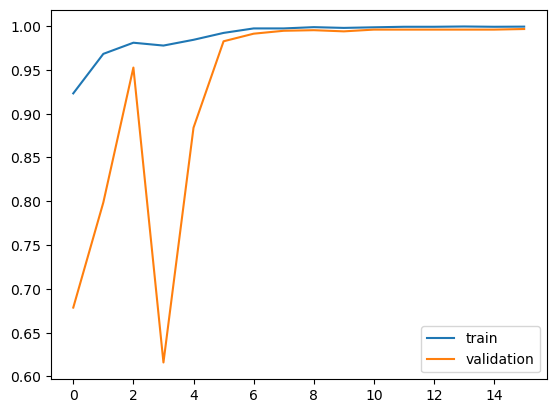

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

- 초반에 갈피를 못잡다가 여섯번째 에포크 이후로 높은 수치로 안정적인 모습을 보인다.

In [78]:
model = create_model(model_name='mobilenet', verbose=False)
model.load_weights('./callback_files/weights.016-0.0144-0.9994.weights.h5')

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_6508\433207055.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


In [82]:
model

<Functional name=functional_9, built=True>

In [83]:
def preprocessing_scaling_for_train(image, mode='tf'):
    aug = A.Compose([A.HorizontalFlip(p=0.5), 
                     A.VerticalFlip(p=0.5), 
                     A.OneOf([A.ColorJitter(p=1), 
                              A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1)], 
                             p=1)], p=0.5)
    image = aug(image=image)['image']
    
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
['cat', 'dog', 'wild']


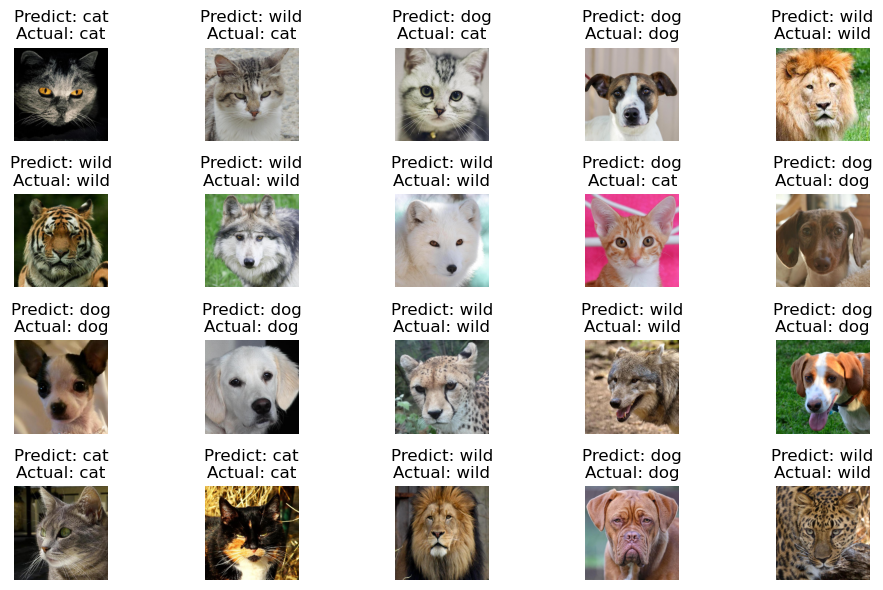

In [103]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import albumentations as A

IMAGE_DIR = './datasets/afhq/test/'
class_names = train_df.target_names.unique().tolist()

def load_random_images(image_dir, class_names, num_images=20):
    selected_classes = random.choices(class_names, k=num_images)
    images = []
    labels = []
    
    for class_name in selected_classes:
        class_dir = os.path.join(image_dir, class_name)
        all_images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.png')]
        selected_image = random.choice(all_images)
        images.append(selected_image)
        labels.append(class_name)
    
    return images, labels

def preprocess_image(image_path, image_size, mode='torch'):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (image_size, image_size))
    preprocessed_image = preprocessing_scaling(resized_image, mode=mode)
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    return preprocessed_image

random_images, random_labels = load_random_images(IMAGE_DIR, class_names, num_images=20)

plt.figure(figsize=(10, 6))

for idx, image_path in enumerate(random_images):
    preprocessed_image = preprocess_image(image_path, IMAGE_SIZE, mode='torch')
    predictions = model.predict(preprocessed_image)
    # print(predictions[0])
    predicted_index = np.argmax(predictions[0])
    # predicted_class = int(predictions[0][0] < 0.5)

    # print(predicted_index)
    # print(class_names)
    
    predicted_class_name = class_names[predicted_index]
    
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(4, 5, idx + 1)
    plt.imshow(image)
    plt.title(f"Predict: {predicted_class_name}\nActual: {random_labels[idx]}")
    plt.axis('off')

# print(class_names)
plt.tight_layout()
plt.show()

- 20개의 테스트 이미지 중 두개를 틀려서 정확도에 비해 조금 아쉽지만 이정도면 만족스러운 결과인듯 하다.
- 이미지를 확인해보면 cat과 dog는 강아지와 고양이 각 한카테고리로 되어있지만, wild를 보면 사자, 여우, 표범, 늑대 등 다양하고 비슷한 종이 섞여있어서 조금 어려움이 있었다고 생각된다.
- 그럼에도 사전훈련모델이 동물 분류는 잘 되어있어서 그런지 잘 맞추는것을 볼 수 있었다.

이미지 사이즈, 배치사이즈